In [4]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [5]:
df = import_submission("sub_124845")

In [6]:
mask = np.logical_and(df.Longitude.between(25,40),df.Latitude.between(-57,1000))
dfm = df[mask]
del dfm["TripId"]
N = len(dfm)


0.0900259004862
0.0900259004862 ====================================
0 1 0.0263987060915 ++++++++++++++ 0.0
0.0263987060915 0.0192929459906 0.00710576010096
0.0192929459906 0.0146788667908 0.0046140791998
0.0146788667908 0.0136848299944 0.000994036796394
0.0136848299944 0.013509542113 0.000175287881394
0.013509542113 0.0132335743932 0.000275967719811
0.0132335743932 0.0130074717021 0.000226102691071
0.0130074717021 0.0129884416577 1.90300444174e-05
0.0129884416577 0.0129869112085 1.53044920647e-06
wrote change to df 0.0766141064367
1 2 0.031480997488 ++++++++++++++ 0.47
0.031480997488 0.0311493271749 0.000331670313092
0.0311493271749 0.0307708784257 0.000378448749202
0.0307708784257 0.0304207560863 0.000350122339352
0.0304207560863 0.0301306749245 0.000290081161794
0.0301306749245 0.0299607849442 0.000169889980335
0.0299607849442 0.0298443175798 0.000116467364454
0.0298443175798 0.0297271342311 0.00011718334869
0.0297271342311 0.0295981476189 0.000128986612129
0.0295981476189 0.0294382

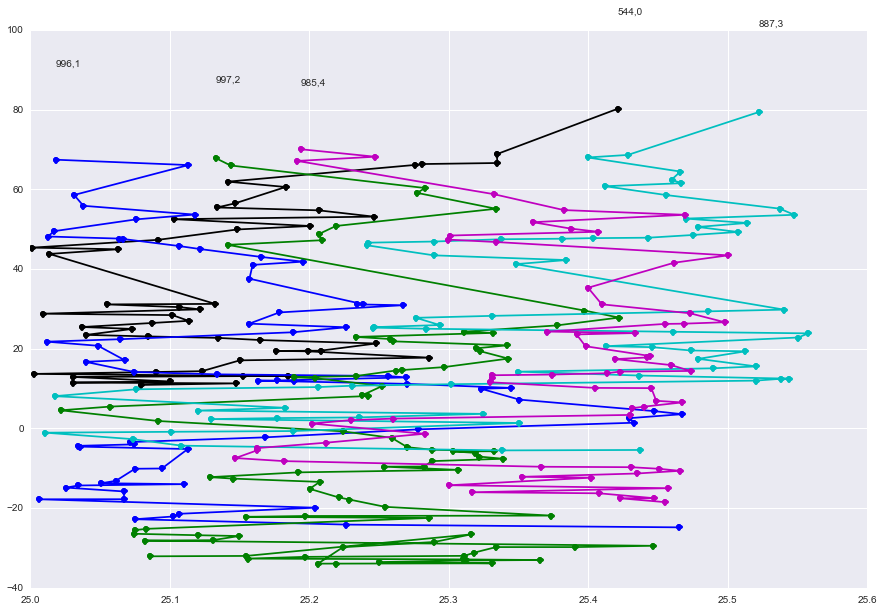

0.0582148786946
0.0582148786946 ====================================
0 1 0.0236767809846 ++++++++++++++ 0.0
0.0236767809846 0.0168380660647 0.00683871491986
0.0168380660647 0.0147744748796 0.00206359118509
0.0147744748796 0.0133698629195 0.00140461196012
0.0133698629195 0.0130201116854 0.000349751234139
0.0130201116854 0.0128983729515 0.000121738733895
0.0128983729515 0.0128223459875 7.60269639782e-05
0.0128223459875 0.0128156911848 6.65480271112e-06
0.0128156911848 0.012815438261 2.52923808626e-07
0.012815438261 0.012814036557 1.40170395754e-06
0.012814036557 0.0128110895752 2.94698186501e-06
wrote change to df 0.0473491875651
1 2 0.0224808942951 ++++++++++++++ 0.19
0.0224808942951 0.0208618840197 0.00161901027537
0.0208618840197 0.0195314658917 0.00133041812805
0.0195314658917 0.0184755793794 0.00105588651227
0.0184755793794 0.0176774819098 0.000798097469597
0.0176774819098 0.0166328345576 0.00104464735224
0.0166328345576 0.0162130273898 0.000419807167793
0.0162130273898 0.0162129478

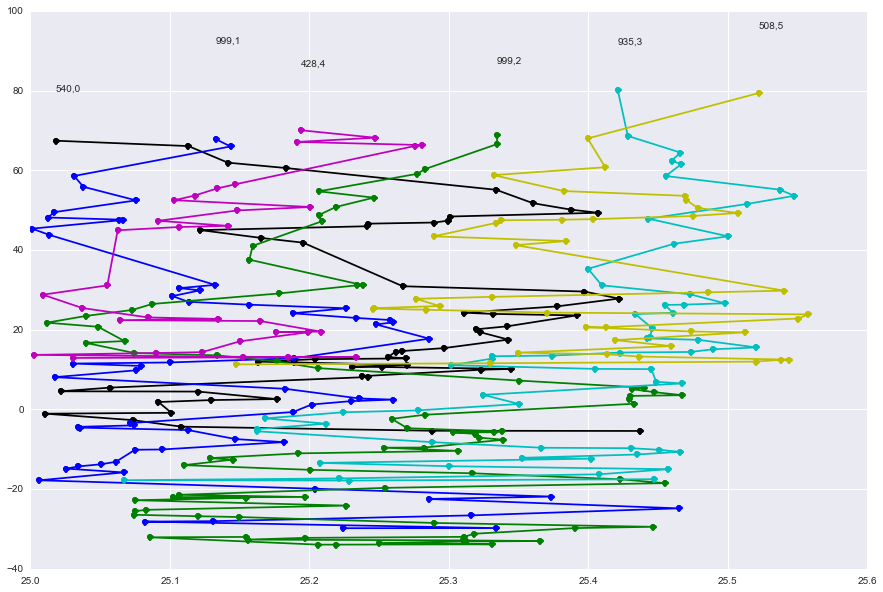

0.0610252923265
0.0610252923265 ====================================
0 1 0.0231151392556 ++++++++++++++ 0.0
0.0231151392556 0.0178370085954 0.00527813066017
0.0178370085954 0.0150409385892 0.00279607000624
0.0150409385892 0.0136333827516 0.00140755583758
0.0136333827516 0.0134309644515 0.0002024183001
0.0134309644515 0.0132545174447 0.000176447006812
0.0132545174447 0.0132271926122 2.73248324618e-05
0.0132271926122 0.0130386324559 0.000188560156346
0.0130386324559 0.0130177740507 2.08584051997e-05
0.0130177740507 0.0130140068799 3.76717073334e-06
0.0130140068799 0.0130095327546 4.47412531111e-06
wrote change to df 0.050919685975
1 2 0.0160269396029 ++++++++++++++ 0.13
0.0160269396029 0.0160261710484 7.6855449245e-07
0.0160261710484 0.0160259767894 1.94258988968e-07
0.0160259767894 0.0160255800142 3.96775202232e-07
wrote change to df 0.0509183263375
2 3 0.0152009017749 ++++++++++++++ 0.19
0.0152009017749 0.0125890792356 0.00261182253935
0.0125890792356 0.0120976061182 0.00049147311744
0

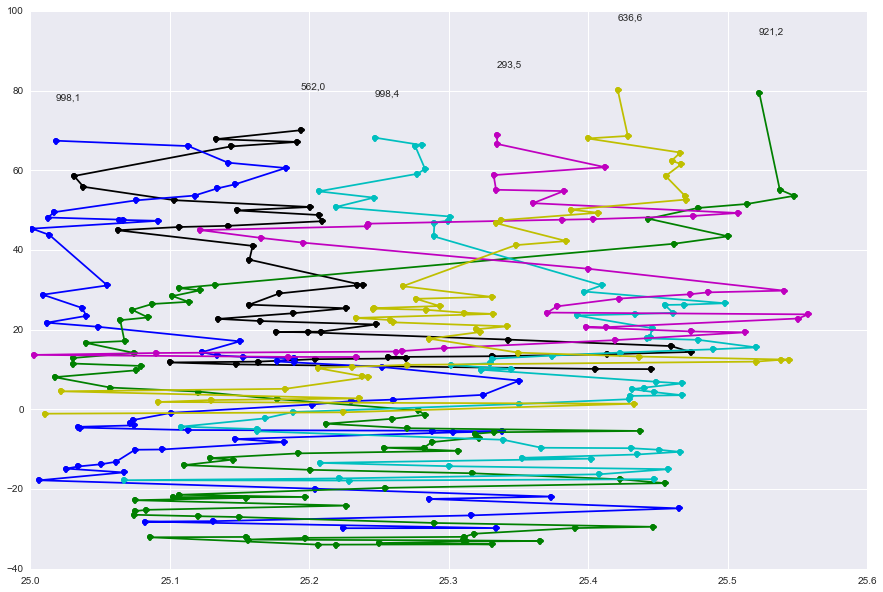

0.0601192349562
0.0601192349562 ====================================
0 1 0.00623388273628 ++++++++++++++ 0.0
0.00623388273628 0.0059208005406 0.000313082195683
0.0059208005406 0.00579323213589 0.00012756840471
0.00579323213589 0.00568834973192 0.000104882403966
0.00568834973192 0.00568819518996 1.5454195956e-07
0.00568819518996 0.00568818974215 5.4478061888e-09
wrote change to df 0.0595735419965
1 2 0.00623741390248 ++++++++++++++ 0.06
0.00623741390248 0.00623719869453 2.15207952257e-07
0.00623719869453 0.00623719690316 1.79136300585e-09
wrote change to df 0.0595733248494
2 3 0.0160296805972 ++++++++++++++ 0.08
0.0160296805972 0.011701251516 0.00432842908117
0.011701251516 0.00952962606663 0.0021716254494
0.00952962606663 0.00845396888963 0.001075657177
0.00845396888963 0.0081588047914 0.000295164098235
0.0081588047914 0.00808349926437 7.53055270223e-05
0.00808349926437 0.00805249254487 3.10067195004e-05
0.00805249254487 0.00805011867144 2.37387343166e-06
0.00805011867144 0.00804270720

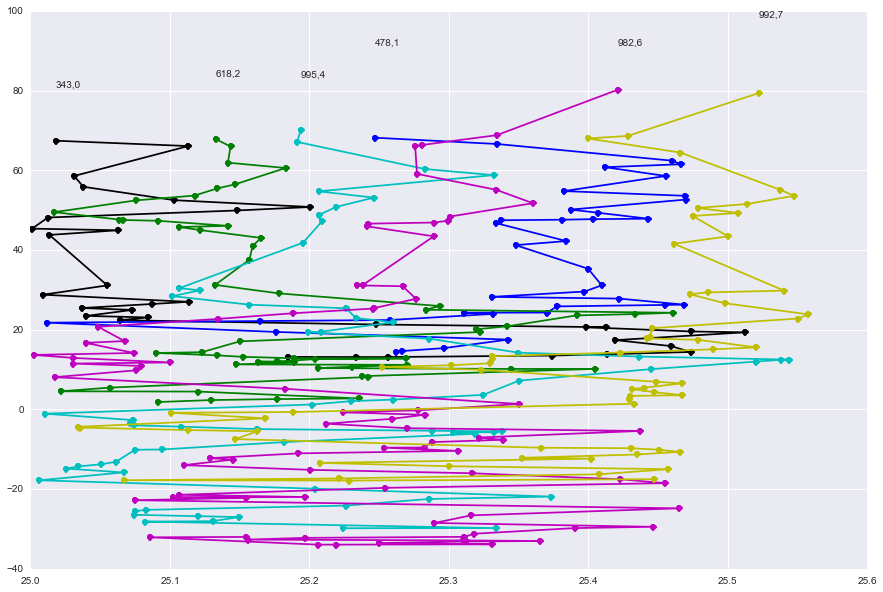

0.0540199742686
0.0540199742686 ====================================
0 1 0.0132103427428 ++++++++++++++ 0.0
0.0132103427428 0.0103798913696 0.00283045137325
0.0103798913696 0.00991122418276 0.000468667186834
0.00991122418276 0.00974575569175 0.000165468491005
0.00974575569175 0.00963767997861 0.000108075713139
0.00963767997861 0.0094671322385 0.000170547740114
0.0094671322385 0.00946410963498 3.02260352237e-06
0.00946410963498 0.00946305890841 1.05072656711e-06
0.00946305890841 0.00945548642983 7.57247858279e-06
0.00945548642983 0.00945459882208 8.8760774122e-07
0.00945459882208 0.00945049203512 4.10678696668e-06
0.00945049203512 0.00943661332673 1.38787083851e-05
0.00943661332673 0.00943043244022 6.18088651258e-06
0.00943043244022 0.00943043241867 2.15465319198e-11
wrote change to df 0.0502400637138
1 2 0.0134812573073 ++++++++++++++ 0.08
0.0134812573073 0.0122944650628 0.00118679224447
0.0122944650628 0.0119074949412 0.000386970121621
0.0119074949412 0.0115808317068 0.000326663234401

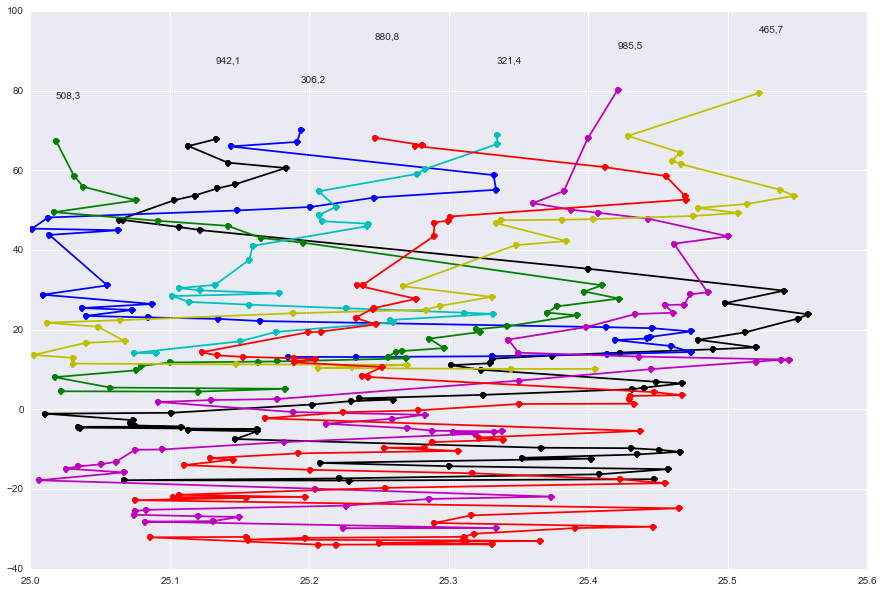

[[5, 0, array([  0,  66, 132, 198, 264, 330]), 4, 0.036861017458563253],
 [6, 0, array([  0,  55, 110, 165, 220, 275, 330]), 5, 0.036953666379107755],
 [6,
  0,
  array([  0,  47,  94, 141, 188, 235, 282, 330]),
  6,
  0.036948750803618369],
 [6,
  0,
  array([  0,  41,  82, 123, 165, 206, 247, 288, 330]),
  7,
  0.036933569449021444],
 [7,
  0,
  array([  0,  36,  73, 110, 146, 183, 220, 256, 293, 330]),
  8,
  0.037103385708270195]]

In [8]:
dfm = df[mask][0:330]
del dfm["TripId"]
N = len(dfm)
breaks2 = np.linspace(0,N,3).astype(int)
breaks3 = np.linspace(0,N,4).astype(int)
out = []
d_ran = [0]
seg_ran = [5,6,7,8,9]
for d in d_ran:
    for bc in seg_ran:
        b = np.linspace(0,N,bc+1).astype(int)
        dfm["TripId"] = np.nan
        for k,(s,f) in enumerate(window(b)):
            dfm["TripId"][s:f] = k
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
#         dfm,score = combo_optimizer(dfm,[0,1,2])
        if dfm.groupby("Weight").agg({"Weight":np.sum}).max().values[0]>1000:
            continue
        out.append([len(np.unique(dfm.TripId)),d,b,k,score])
        plot_trips(dfm,range(10))
        plt.show()
out

In [ ]:
plot_trips(dfm,range(10))

In [3]:
dfm = combo_optimizer(dfm,[0,1])

NameError: name 'combo_optimizer' is not defined